In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converting labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
# Building the CNN
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))

# Flattening the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,# Use fewer epochs for a faster run
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.6879 - loss: 0.9016 - val_accuracy: 0.6876 - val_loss: 0.8831
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7120 - loss: 0.8425 - val_accuracy: 0.7106 - val_loss: 0.8248
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7237 - loss: 0.7925 - val_accuracy: 0.6940 - val_loss: 0.8644
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7393 - loss: 0.7475 - val_accuracy: 0.7204 - val_loss: 0.8062
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7563 - loss: 0.7001 - val_accuracy: 0.7261 - val_loss: 0.8034
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7652 - loss: 0.6648 - val_accuracy: 0.7307 - val_loss: 0.7800
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.7803 - loss: 0.6296 - val_accuracy: 0.7287 - val_loss: 0.8207
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.7863 - loss: 0.6039 - 

In [23]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


313/313 - 2s - 7ms/step - accuracy: 0.7317 - loss: 0.8481
Test accuracy: 73.17%


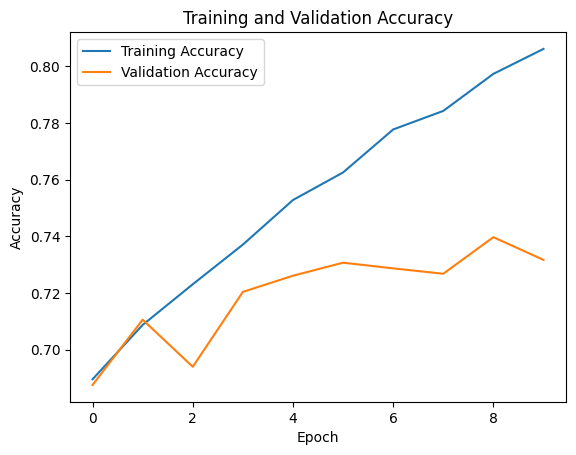

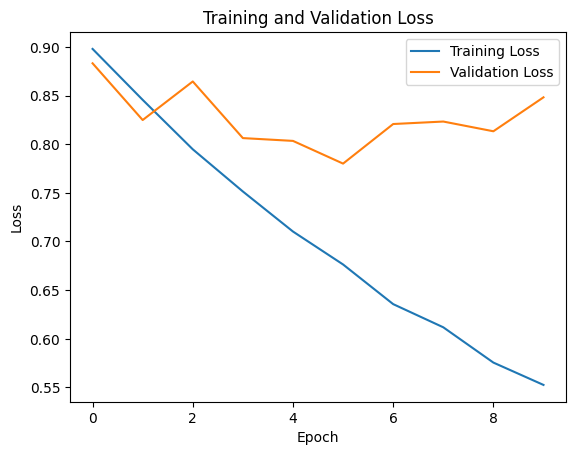

In [24]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Class: 2, Actual Class: 2


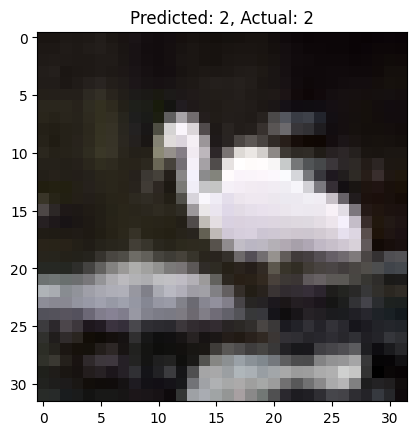

In [38]:
import numpy as np

# Test with a random image from the test set
random_index = np.random.randint(0, x_test.shape[0])
sample_image = x_test[random_index]
true_label = y_test[random_index]

# Predict
predicted_label = model.predict(sample_image.reshape(1, 32, 32, 3))
predicted_class = np.argmax(predicted_label)
actual_class = np.argmax(true_label)

print(f"Predicted Class: {predicted_class}, Actual Class: {actual_class}")

# Visualize the sample image
plt.imshow(sample_image)
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.show()
